# AP Calculus AB Scoring Statistics Analysis

This analysis was created February 2024. The notebook contains analyses 
performed on the AP Calculus AB scoring statistics, including trend 
analysis, difficulty analysis, correlation analysis, and more.

The project's goal was to extract information from the College Board's 
sample Student responses and scoring commentary to try to find any 
relationships with previous exams in order to help students better 
prepare for the AP Calc exam.

The data was extracted and turned into csv files, and then concatenated 
into one file. All analysis was performed on that concatenated file in 
the following notebook.

## Data Loading and Overview

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Load the dataset
data_path = 'concatenated_ap_calculus_ab_scoring_statistics.csv'
data = pd.read_csv(data_path)
data.head()
    

,Year,Question,Mean,Standard Deviation,Number of Possible Points
0,2023,1,3.79,2.57,9
1,2023,2,4.62,3.14,9
2,2023,3,2.07,2.28,9
3,2023,4,2.70,2.17,9
4,2023,5,4.46,3.26,9


# Trend Analysis

We will now examines how the average scores for each question have changed over the years. 

We'll plot the mean scores for each question across the years to visualize any trends. This will help us understand if questions are becoming easier or harder over time or if certain patterns emerge.

We'll begin by creating a line plot where each line represents a question, the x-axis represents the years, and the y-axis represents the mean scores.

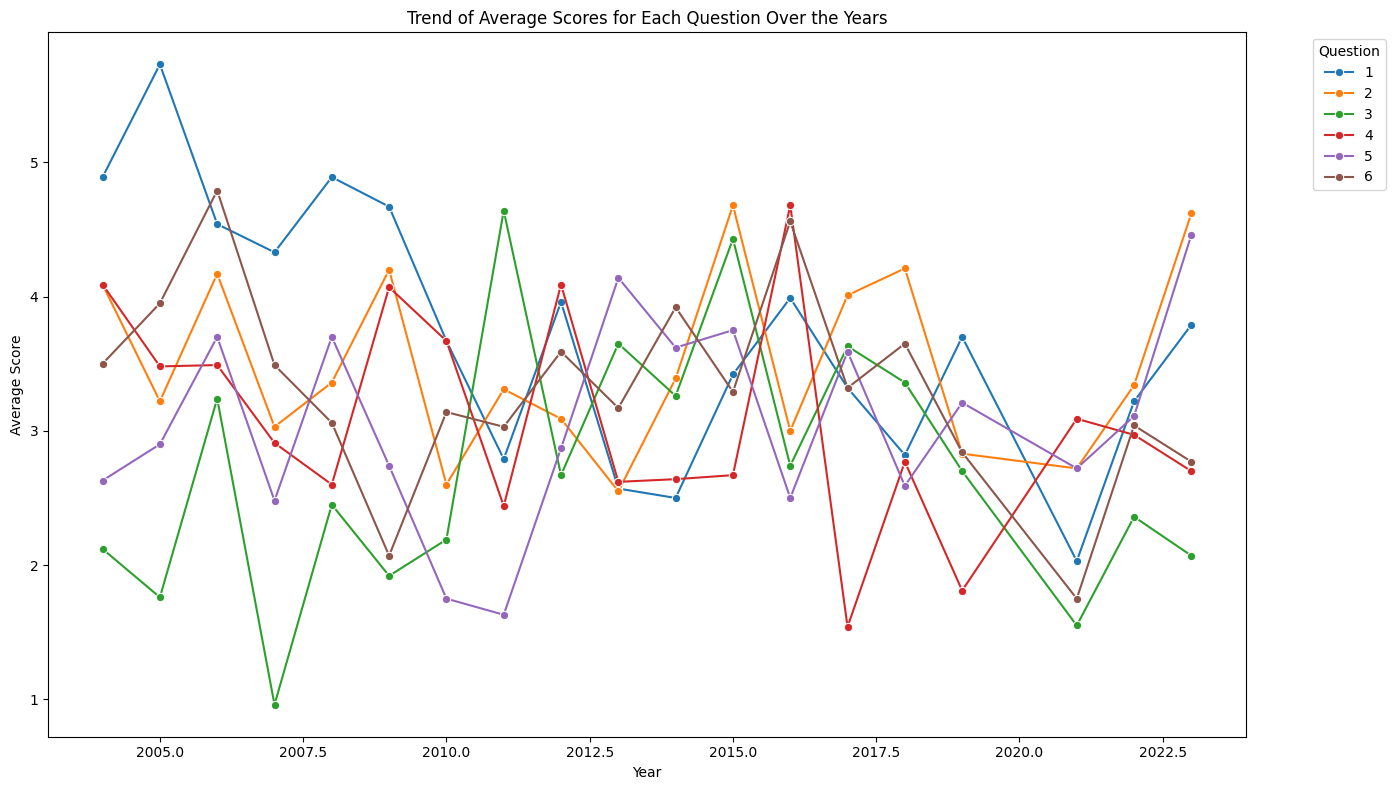

In [2]:

# Plotting the trend of mean scores for each question over the years
plt.figure(figsize=(14, 8))
sns.lineplot(data=data, x='Year', y='Mean', hue='Question', marker='o', palette='tab10')
plt.title('Trend of Average Scores for Each Question Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Score')
plt.legend(title='Question', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
    

The line plot above illustrates the trend of average scores for each question over the years. Each line represents a different question, allowing us to observe how the average scores have evolved.

Let's separate each question into it's own chart so we can see more easily if there are any patterns or trends in difficulty.

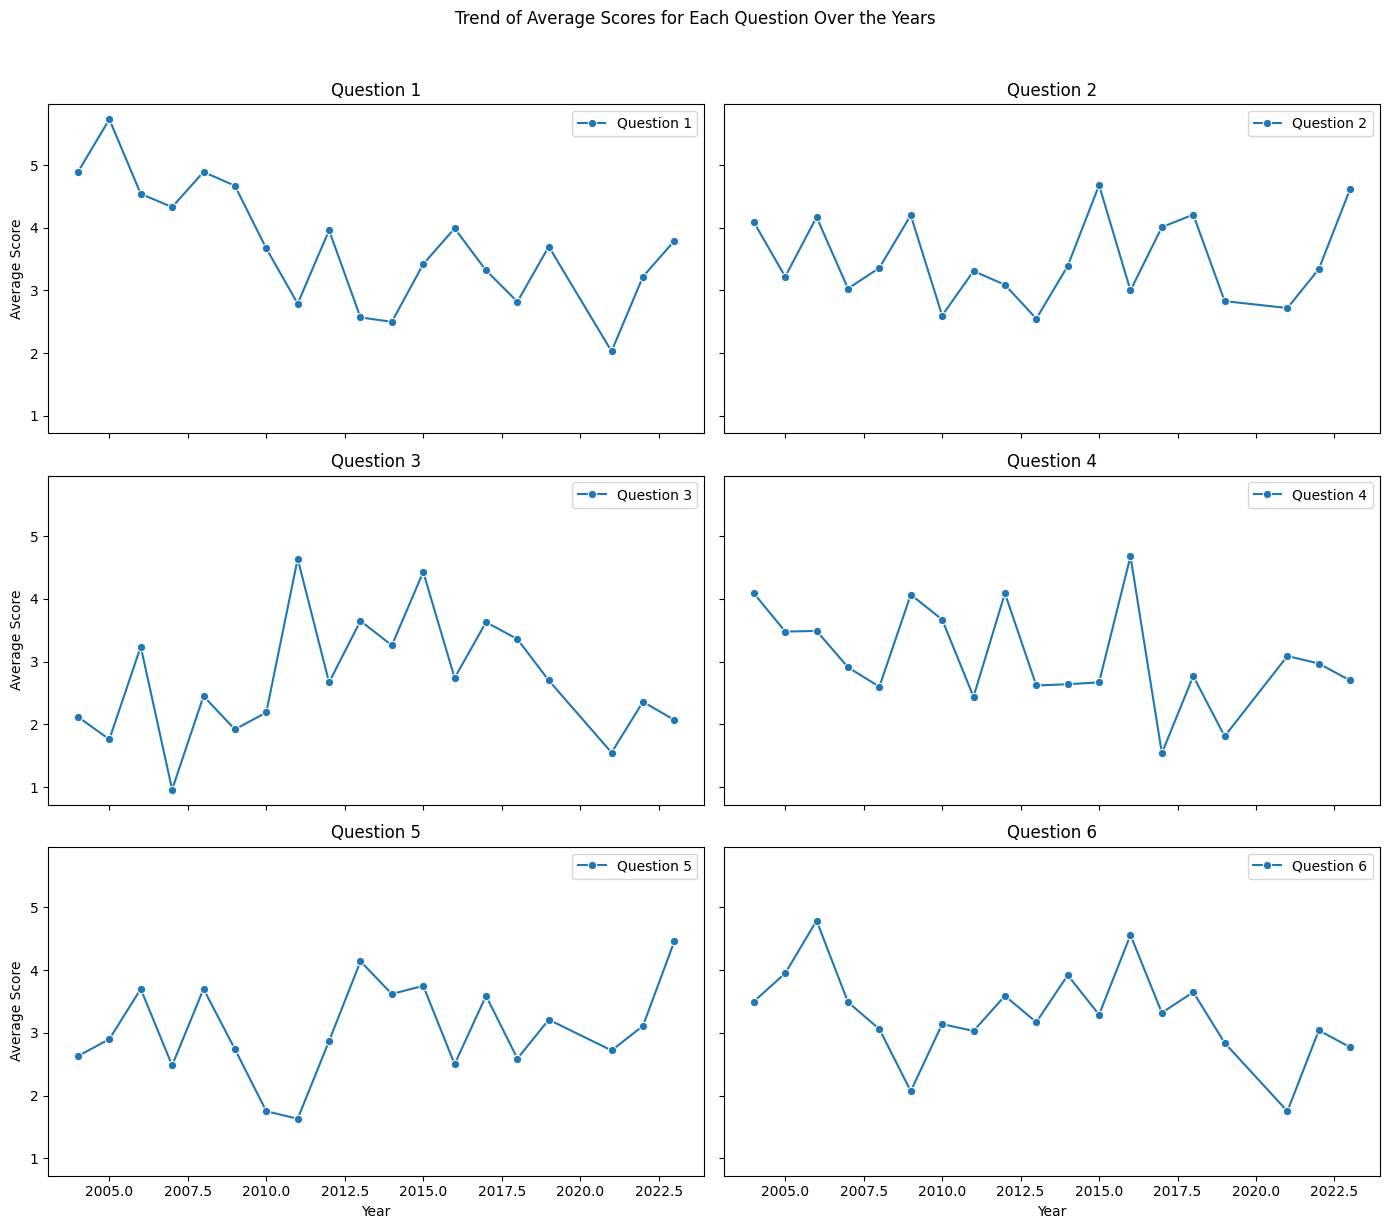

In [3]:
# Plotting the trend of mean scores for each question over the years
fig, axes = plt.subplots(3, 2, figsize=(14, 12), sharex=True, sharey=True)

for ax, question in zip(axes.flatten(), data['Question'].unique()):
    sns.lineplot(data=data[data['Question'] == question], x='Year', y='Mean', marker='o', ax=ax)
    ax.set_title(f'Question {question}')
    ax.set_xlabel('Year')
    ax.set_ylabel('Average Score')
    ax.legend([f'Question {question}'], loc='upper right')

plt.suptitle('Trend of Average Scores for Each Question Over the Years', y=1.02)
plt.tight_layout()
plt.show()


## Trend Analysis Summary
In examining the trends of average scores for AP Calculus AB exam questions over the years, we observed:
- Fluctuations in average scores for some questions, reflecting changes in difficulty or student preparedness.
- Certain questions exhibit a general trend of increasing or decreasing average scores, hinting at evolving teaching methods, exam formats, or student familiarity with topics.
- The variation in average scores between questions within the same year suggests a range of difficulties, with some questions consistently being harder or easier for students.

These observations, visualized through line plots, highlight the dynamic nature of exam performance and underscore the importance of adapting teaching strategies and study materials to address changing trends.

Next, we can proceed to the Difficulty Analysis to assess the relative difficulty of each question within a year, based on mean scores and standard deviations. We'll then look at Question Difficulty Trends to analyze if certain questions are consistently more challenging over the years. 

## Difficulty Analysis

In our quest to uncover the nuances of AP Calculus AB exam difficulty, we embark on a focused analysis of each question's performance within a single year. Our objective? To discern the relative challenge posed by each question, employing two key indicators: mean scores and standard deviations.

- **Mean Scores**: Think of these as the average performance across all students for each question. A lower average could hint at a tougher question, one that perhaps demands a deeper understanding or skill.

- **Standard Deviations**: This measures the spread of scores. Imagine a question that most students score similarly on, versus one with scores all over the map. A higher standard deviation in this context could signal a question that's not only challenging but also inconsistently understood or approached by students.

With a canvas as broad as multiple years and questions, clarity demands we zoom in. We'll begin with the most recent year available, painting a detailed picture of that snapshot in time before widening our lens.


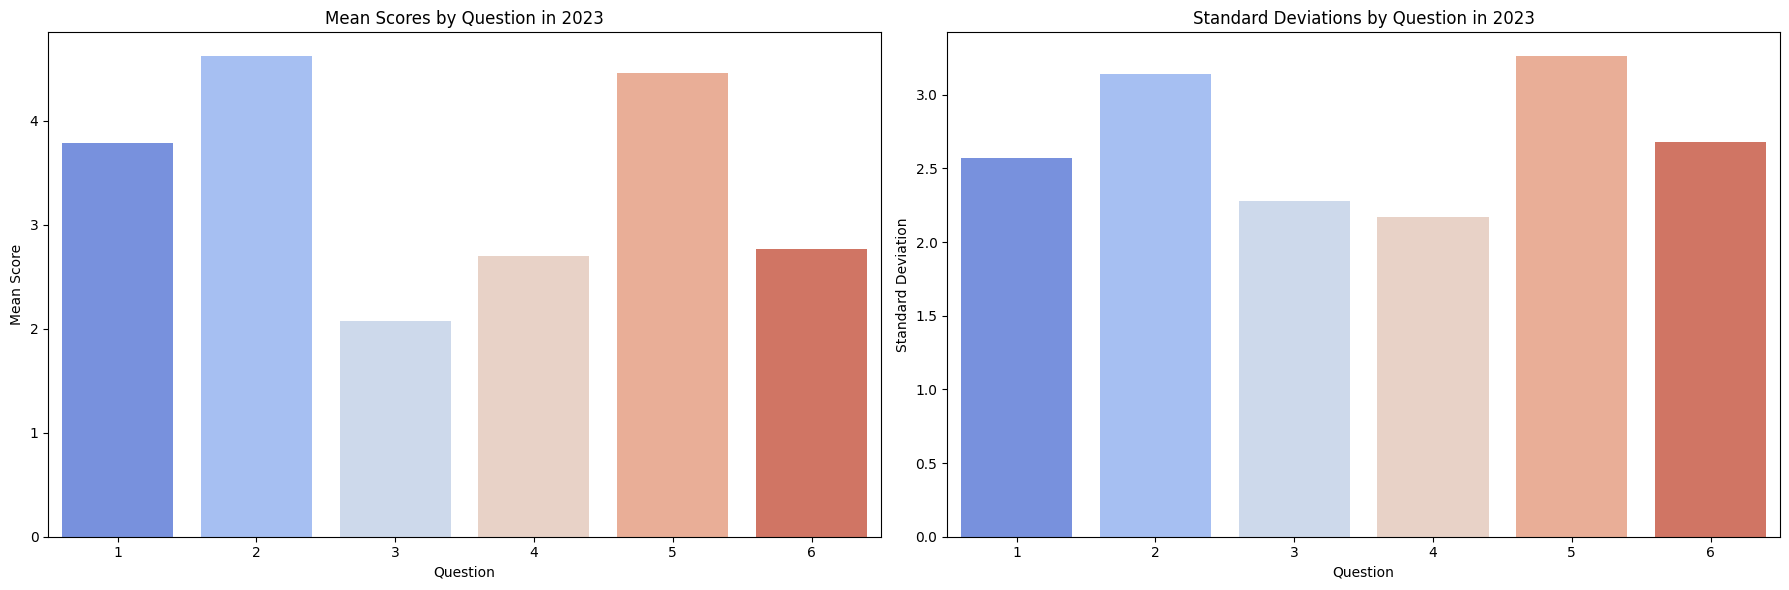

In [4]:
import warnings

# Suppress future warnings from seaborn specifically
warnings.simplefilter(action='ignore', category=FutureWarning)



# Difficulty analysis for the most recent year
most_recent_year = data['Year'].max()
data_recent_year = data[data['Year'] == most_recent_year]

fig, axes = plt.subplots(1, 2, figsize=(18, 6))
sns.barplot(ax=axes[0], data=data_recent_year, x='Question', y='Mean', palette='coolwarm')
axes[0].set_title(f'Mean Scores by Question in {most_recent_year}')
axes[0].set_xlabel('Question')
axes[0].set_ylabel('Mean Score')

sns.barplot(ax=axes[1], data=data_recent_year, x='Question', y='Standard Deviation', palette='coolwarm')
axes[1].set_title(f'Standard Deviations by Question in {most_recent_year}')
axes[1].set_xlabel('Question')
axes[1].set_ylabel('Standard Deviation')

plt.tight_layout()
plt.show()
    

The bar plots give us a quick glance at how students performed on each question in the latest exam year:

- **Mean Scores Plot**: This shows the average score for each question. Questions with lower bars were generally harder for students, as the average scores were lower.
- **Standard Deviation Plot**: This shows how varied the scores were for each question. Higher bars mean more variation in scores, which could indicate that students were unsure about how to approach the question or had different levels of understanding.

These plots help us identify which questions were challenging and which ones had more varied student responses.


To get a fuller picture, we'll next look at box plots, which will show us the distribution of mean scores for each question over multiple years. This way, we can see if some questions are consistently difficult or if the variability in scores is a common trend. 

It's like zooming out to see the whole forest instead of just focusing on one tree. 

Let's dive into the box plots to explore these patterns over time.

## Box Plot Analysis

In this section, we delve into the box plots, which map out the distribution of mean scores for each AP Calculus AB exam question over multiple years. Here's what we're looking at:

- **The Box**: Each box represents a question, with the line in the middle marking the median score. The top and bottom edges of the box show the upper (75th percentile) and lower (25th percentile) quartiles, respectively. This gives us a quick snapshot of where the bulk of scores lie.
- **The Whiskers**: These lines extending from the boxes reach out to the highest and lowest scores that aren't considered outliers, giving us a sense of the range of typical scores.
- **Outliers**: Marked as individual points, outliers are scores that fall well outside the general spread, hinting at years that were unusually tough or easy.

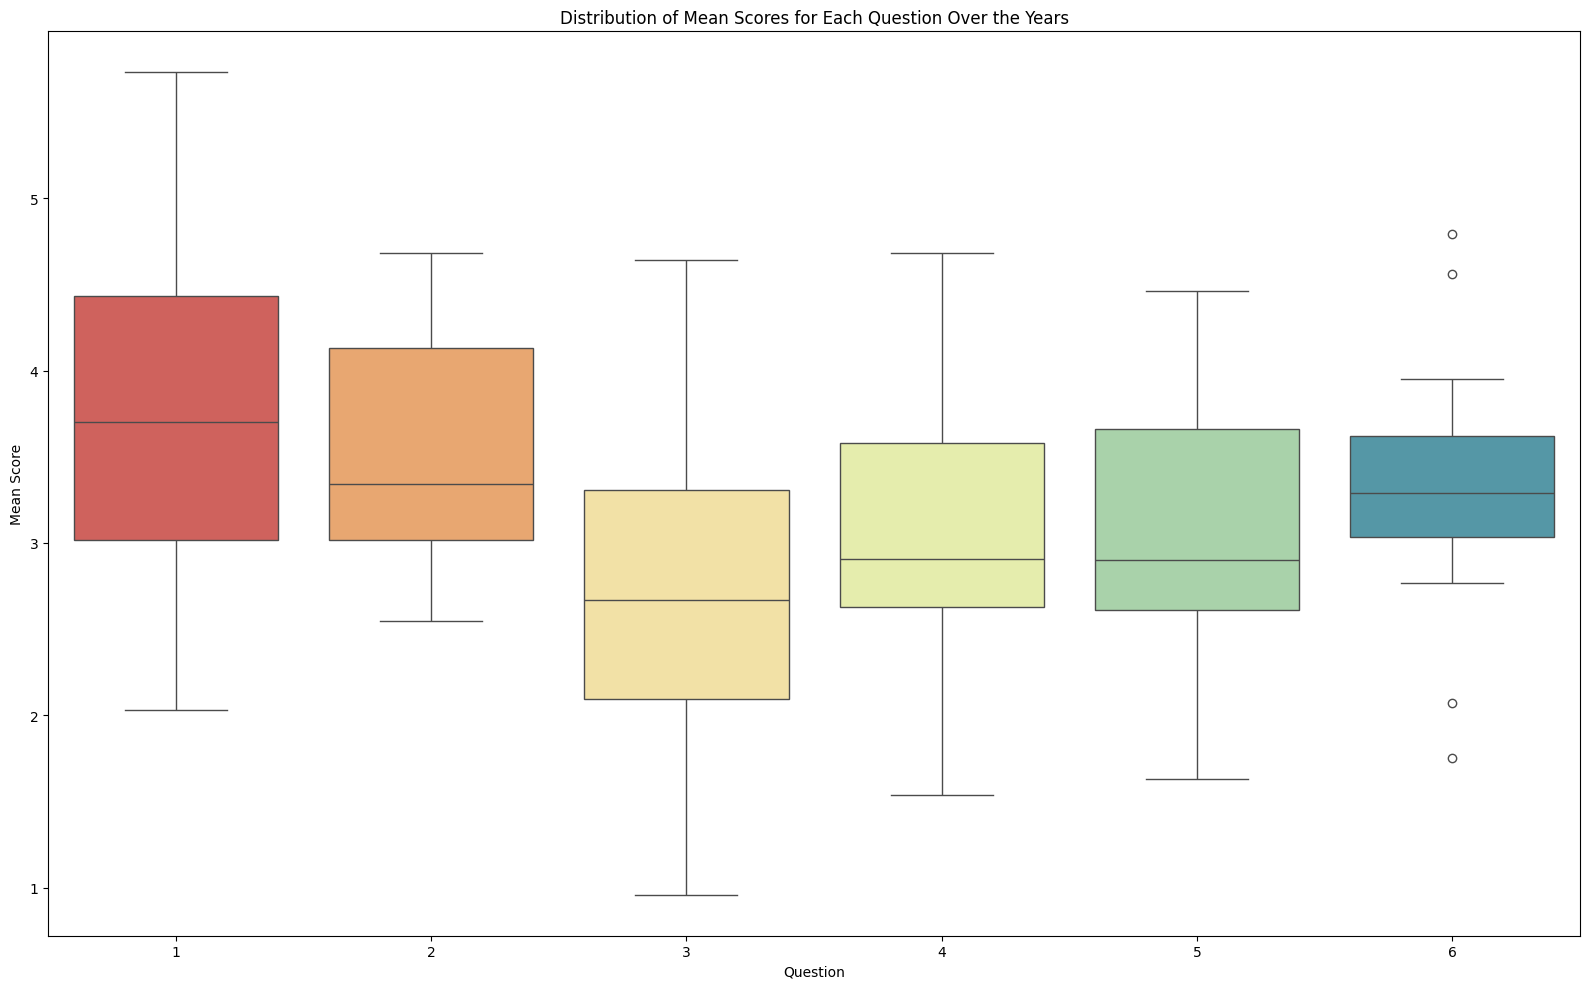

In [5]:
# Setting up the figure size and layout
plt.figure(figsize=(16, 10))

# Creating box plots for the distribution of mean scores for each question over the years
sns.boxplot(data=data, x='Question', y='Mean', palette='Spectral')

plt.title('Distribution of Mean Scores for Each Question Over the Years')
plt.xlabel('Question')
plt.ylabel('Mean Score')

# Display the plot
plt.tight_layout()
plt.show()


The box plots above illustrate the distribution of mean scores for each question over the years. Each box plot represents a different question, with the central line in each box indicating the median score, the box edges representing the first and third quartiles, and the whiskers extending to show the range of the data, excluding outliers.

From these plots, you can observe:

- The variation in median scores across questions, which can indicate the relative difficulty of each question.
- The spread of scores (interquartile range) for each question, showing how consistently students performed.
- Outliers, if any, which could indicate years where the question was particularly difficult or easy compared to other years.

This visualization helps identify which questions have been consistently challenging or easier for students over time and the stability of question difficulty across years.

The insights drawn from the box plot visualization can provide valuable information about the performance trends and variability in scores for each question over the years:

1. General Difficulty of Question 3: You're correct in observing that Question 3 appears to be the hardest on average, as indicated by its lower median scores compared to other questions. This suggests that students generally score less on this question, making it more challenging.

2. Easiness of Question 1: The higher median scores and the position of the box for Question 1 indicate it's generally easier for students. The higher scores suggest that most students were able to secure a good number of points on this question.

3. Median Near the Bottom for Questions 2, 4, and 5: When the median line is closer to the bottom of the box (as seen for Questions 2, 4, and 5), it indicates that a larger proportion of scores are clustered towards the lower end of the middle 50% of the data. This could mean that while some students scored well, a significant portion found these questions relatively more challenging, dragging the median down.

4. Consistency of Question 6: The short box for Question 6 suggests low variability in scores, meaning students' performances on this question are quite consistent year over year. A shorter box implies that the first quartile (25th percentile) and the third quartile (75th percentile) are close together, indicating that most students scored within a narrow range. This could be interpreted as the question having a clear and well-understood set of expectations or that it taps into well-established knowledge or skills.

5. Variability in Other Questions: For Questions 2, 4, and 5, where the boxes are taller, there is greater variability in student scores. This means there's a wider spread in how students perform on these questions, possibly due to differences in how well students understand the topics these questions cover, or the questions might be more open to interpretation, leading to a broader range of scores.

6. Outliers: Outliers, represented by individual points outside the whiskers, indicate years where the mean scores for a question were exceptionally high or low compared to other years. These could point to years where the question was unusually difficult or easy, or where external factors might have affected student performance.

Overall, the box plots suggest that while some questions have relatively consistent levels of difficulty and student performance, others show more variability, potentially indicating areas where curriculum or instruction could be targeted for improvement.


### Difficulty Analysis Detailed Summary
Our box plot analysis of question difficulty offers a granular view of how student performances vary across questions and over years. Key observations include:

- **Median Score Variability**: Differences in median scores across questions highlight the relative difficulty, with Question 3 consistently appearing more challenging due to its lower median scores.
- **Score Spread**: The interquartile range for each question reveals the consistency of student performance. For instance, a wider spread in Questions 2, 4, and 5 suggests a greater variability in how students grasp these topics.
- **Outliers**: Points outside the whiskers indicate years with unusually high or low mean scores for certain questions, hinting at fluctuations in question difficulty or external factors affecting performance.
- **Question 1's Easiness**: Higher median scores and box position suggest that Question 1 is generally easier for students, often resulting in higher scores.
- **Median Positioning**: The placement of the median line, especially when closer to the bottom of the box (as seen in Questions 2, 4, and 5), indicates a skew towards lower scores among the middle 50% of students.
- **Consistency in Question 6**: A notably shorter box for Question 6 signifies low score variability, implying consistent student performance and possibly clearer expectations or well-established knowledge areas.
- **Variability Insights**: The taller boxes for certain questions point to a broader range of student performance, possibly due to varying levels of topic understanding or the interpretive nature of the questions.

These detailed insights, derived from the box plot visualization, not only shed light on the overall and relative difficulty of each question but also suggest areas where teaching strategies and study materials might be optimized. This comprehensive analysis demonstrates the depth of examination possible with visual data exploration tools and highlights the value of nuanced data interpretation in identifying educational trends and opportunities for improvement.


## Correlation Analysis

Analyzing the relationships between the scores of different questions within the same year to see if performance on one question is related to performance on another.

For the correlation analysis, we'll examine the relationships between the scores of different questions within the same year. This involves calculating correlation coefficients for each pair of questions to see how scores on one question are related to scores on another. A positive correlation coefficient indicates that higher scores on one question are associated with higher scores on another, suggesting a potential relationship in the skills or knowledge tested by those questions. A negative correlation would suggest an inverse relationship.

Since we're dealing with aggregate data (mean scores for each question per year), we'll need to reshape the data so that each year's scores for all questions are in a single row. Then, we'll calculate the correlation matrix for these annual score profiles.

Let's start by reshaping the data and then proceed to calculate and visualize the correlation matrix.

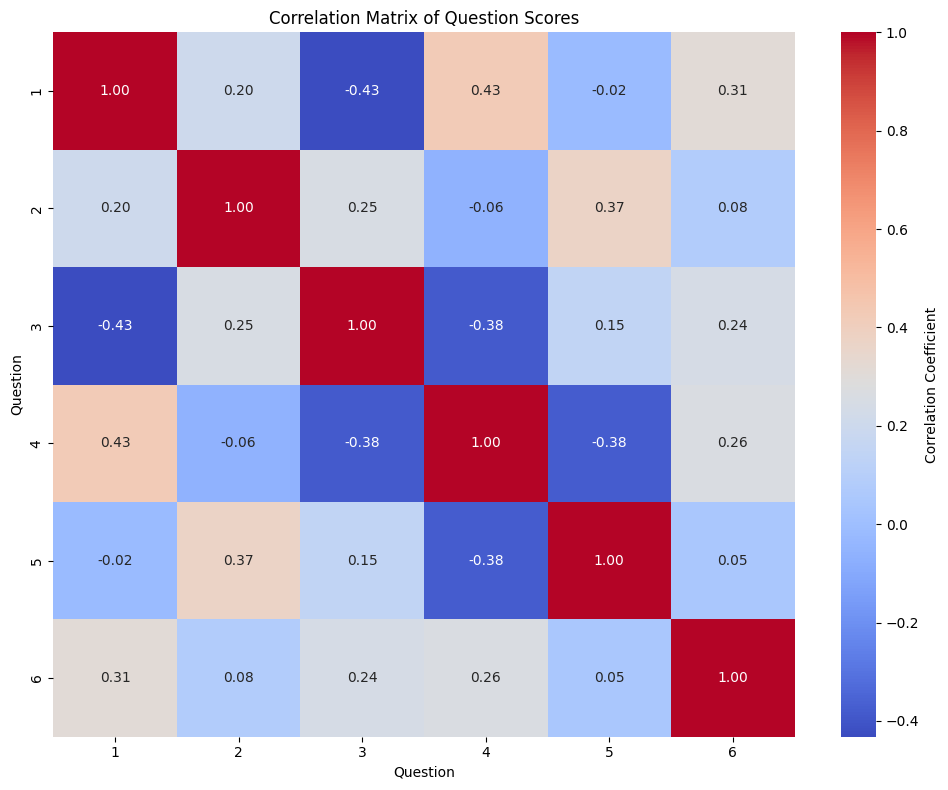

In [6]:

# Reshape the data so that each year's scores for all questions are in a single row
data_pivoted = data.pivot(index='Year', columns='Question', values='Mean')

# Calculate the correlation matrix
correlation_matrix = data_pivoted.corr()

# Visualizing the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Matrix of Question Scores')
plt.xlabel('Question')
plt.ylabel('Question')

plt.tight_layout()
plt.show()
    

The heatmap above displays the correlation matrix of question scores, showing how scores on one question are related to scores on others within the same year. Each cell in the matrix represents the correlation coefficient between two questions, with values ranging from -1 to 1:

Positive Correlations (Red): Values closer to 1 indicate a strong positive correlation, meaning that higher scores on one question are associated with higher scores on another. This could suggest that these questions test similar skills or knowledge areas, or that students who are well-prepared in one area tend to do well in others too.

Negative Correlations (Blue): Values closer to -1 indicate a strong negative correlation, meaning that higher scores on one question are associated with lower scores on another. This is less common in educational data but could occur if questions test very different skills that are not often strong in the same students.

Near-Zero Correlations: Values close to 0 indicate little to no linear relationship between scores on the two questions.

The heatmap provides a visual overview of how question performances are interrelated. Strong positive correlations across most questions could indicate a generally consistent level of preparation or ability among students, while varied correlations might suggest that different questions are tapping into distinct skill sets or knowledge areas.

This analysis helps in understanding the structure of the exam and student performances, potentially guiding curriculum development or student preparation strategies.

## Conclusions

The correlation matrix above shows how the mean scores for each question are related to one another over different years. Here are some insights and potential strategies for tutoring:

1. **Focus on Fundamental Concepts:**

    - Questions 1 and 4 show a moderate positive correlation (0.43), suggesting they might share underlying concepts or skills. Strengthening students' understanding in these areas could potentially improve scores on both questions.
2. **Address Common Challenges:**
    - Question 3 shows a negative correlation with Questions 1 and 4 (-0.43 and -0.38, respectively), indicating that when scores for Question 3 are lower, scores for Questions 1 and 4 tend to be higher, and vice versa. This might suggest that the skills or knowledge required for Question 3 are distinct from those for Questions 1 and 4. Identifying and addressing the specific challenges of Question 3 could help students who are struggling with it.
3. **Integrate Learning Across Topics:**
    - Question 2 shows a positive correlation with Question 5 (0.37), hinting that these questions may test related skills or knowledge areas. Integrating learning strategies that cover both topics might help improve scores in these areas.
4. **Individualized Focus:**
    - The correlations are not very strong for most pairs of questions, indicating diverse skill sets across the exam. It's important to assess individual students to identify their strengths and weaknesses and tailor the tutoring approach to address their specific needs.
5. **Strategic Review:**
    - For questions with lower correlations to others (like Question 6, which shows relatively low correlations with most questions), a targeted review might be necessary to ensure students understand these potentially isolated topics.

In summary, while the correlations provide some insights into how question scores might be related, the moderate to low values suggest that a broad and well-rounded preparation strategy is essential. Tailoring your tutoring to reinforce fundamental concepts, address specific challenges, and integrate learning across related topics could be effective strategies for helping students improve their exam performance

## Regression Analysis

Performing regression analysis to identify trends in the average scores for each question over the years, and assessing the confidence in these trends with statistical measures.

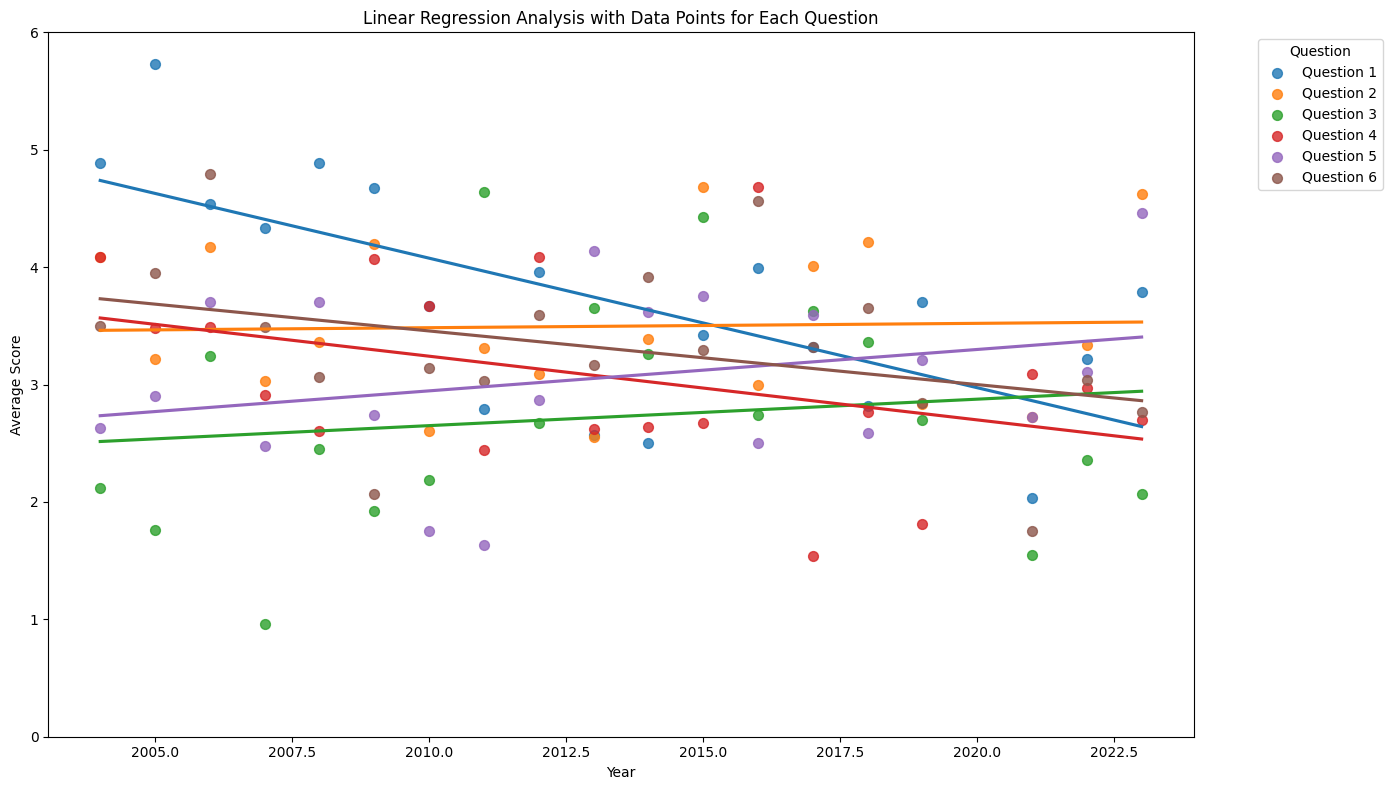

In [7]:
# Plotting linear regression lines for each question along with the actual data points
plt.figure(figsize=(14, 8))

# Loop through each question, plot the regression line and the actual data points
for question in data['Question'].unique():
    question_data = data[data['Question'] == question]
    sns.regplot(data=question_data, x='Year', y='Mean', order=1, ci=None, label=f'Question {question}', scatter_kws={'s':50})

plt.title('Linear Regression Analysis with Data Points for Each Question')
plt.xlabel('Year')
plt.ylabel('Average Score')
plt.ylim(0, 6)  # Setting the y-axis limits as requested
plt.legend(title='Question', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()


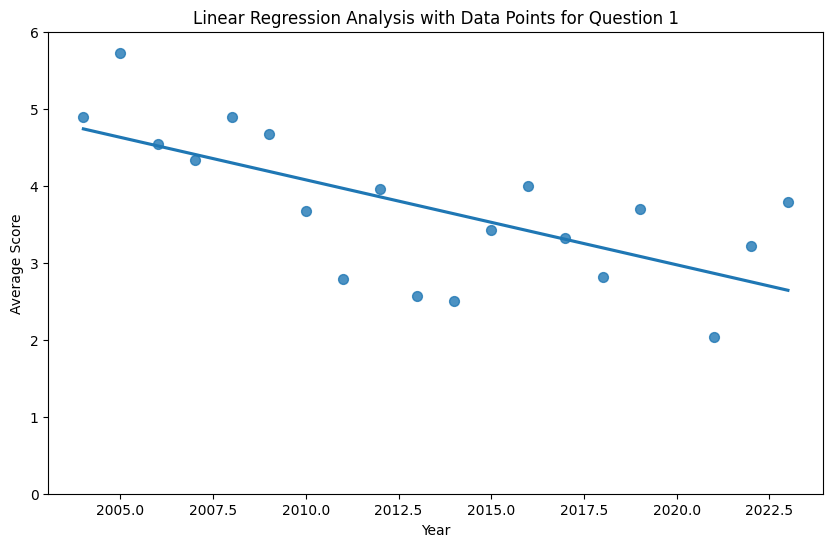

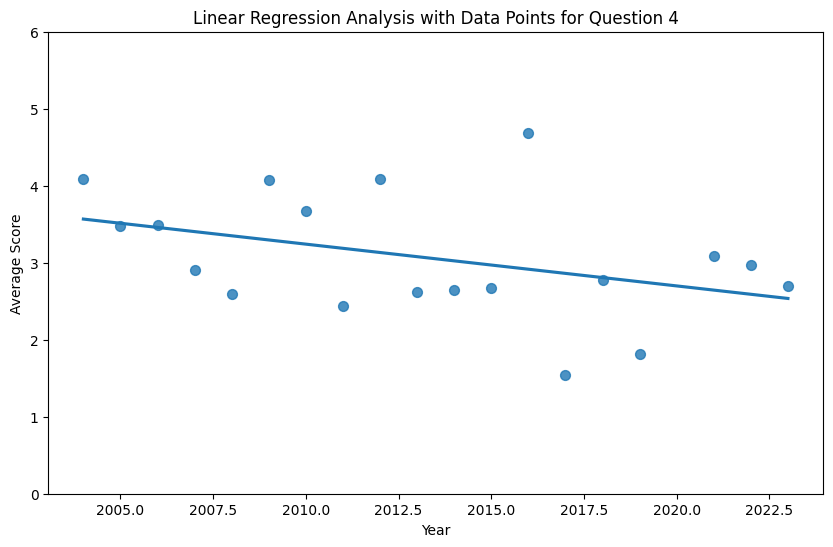

In [8]:

# Function to plot regression analysis with data points for a specific question
def plot_regression_for_question(question_number):
    question_data = data[data['Question'] == question_number]
    plt.figure(figsize=(10, 6))
    sns.regplot(data=question_data, x='Year', y='Mean', order=1, ci=None, scatter_kws={'s':50})
    plt.title(f'Linear Regression Analysis with Data Points for Question {question_number}')
    plt.xlabel('Year')
    plt.ylabel('Average Score')
    plt.ylim(0, 6)  # Setting the y-axis limits
    plt.show()

# Example plots for Question 1 and Question 4
plot_regression_for_question(1)
plot_regression_for_question(4)
    

## Regression Analysis with Statistical Measures

This section performs a regression analysis for each question and provides detailed statistical measures, including R-squared values and p-values, to assess the significance of the trends over time.


In [9]:
from statsmodels.formula.api import ols

# List to store regression analysis results
regression_results_list = []

# Perform regression analysis for each question and collect statistics
for question in data['Question'].unique():
    # Subset data for the question
    question_data = data[data['Question'] == question]
    
    # Define the regression formula
    formula = 'Mean ~ Year'
    
    # Fit the linear regression model
    model = ols(formula, data=question_data).fit()
    
    # Extract R-squared value and the p-value for the slope (Year coefficient)
    r_squared = model.rsquared
    slope_p_value = model.pvalues['Year']
    slope_ci_lower, slope_ci_upper = model.conf_int().loc['Year']
    
    # Add the results to the list
    regression_results_list.append({
        'Question': question,
        'R-squared': r_squared,
        'Slope p-value': slope_p_value,
        'Slope CI Lower': slope_ci_lower,
        'Slope CI Upper': slope_ci_upper
    })

# Convert the list to a DataFrame
regression_results = pd.DataFrame(regression_results_list)

# Display the regression analysis results
regression_results


,Question,R-squared,Slope p-value,Slope CI Lower,Slope CI Upper
0,1,0.452212,0.001608,-0.172469,-0.048194
1,2,0.001032,0.896119,-0.055362,0.062783
2,3,0.019024,0.573371,-0.060285,0.105365
3,4,0.155697,0.094559,-0.118917,0.010396
4,5,0.076088,0.253003,-0.027610,0.098124
5,6,0.135683,0.120721,-0.104678,0.013316


To evaluate the confidence in the regression analysis, we can look at several statistical measures that provide insights into the reliability and significance of the regression results. These measures include:

**R-squared (Coefficient of Determination):** This statistic indicates how well the regression line approximates the real data points. An R-squared value close to 1 suggests that the regression line fits the data well, whereas a value close to 0 indicates a poor fit.

**p-values:** The p-value for each regression coefficient tests the null hypothesis that the coefficient is equal to zero (no effect). A low p-value (< 0.05 is a common threshold) suggests that we can reject the null hypothesis and that the coefficient is likely different from zero, indicating a significant effect.

**Confidence Intervals:** Confidence intervals for the regression coefficients give a range of values that are likely to contain the true value of the coefficient. Narrow confidence intervals indicate more precise estimates.


The table above presents the statistical measures for the linear regression analysis of each question:

R-squared: Indicates the proportion of the variance in the mean scores that is predictable from the year. Higher values suggest a better fit. For example, Question 1 has an R-squared value of approximately 0.45, indicating that around 45% of the variability in the mean scores can be explained by the year, which is relatively substantial.

Slope p-value: Tests the hypothesis that the slope is zero (no trend). A low p-value suggests that we can reject the null hypothesis and that there is a significant trend. Question 1 has a p-value of about 0.0016, indicating strong evidence against the null hypothesis and suggesting a significant trend in the mean scores over time.

Slope Confidence Interval (CI): Provides a range of plausible values for the slope. If the CI does not include zero, it suggests the slope is significantly different from zero, indicating a trend. For Question 1, the CI ranges from approximately -0.172 to -0.048, not including zero, which supports the significance of the trend.

Based on these measures:

1. Question 1 shows a significant negative trend, with moderate confidence in the regression model (R-squared ~ 0.45), meaning the question might be getting harder over time or students are finding it more challenging.
2. Questions 2, 3, 5, and 6 have high p-values and their CIs include zero, indicating no significant trends in their mean scores over the years. The R-squared values for these questions are also relatively low, suggesting that the year does not explain much of the variance in mean scores.
3. Question 4 is somewhat of a borderline case with a p-value close to the common significance threshold (0.0945) and a somewhat higher R-squared value (~0.16). This might suggest a potential trend, but the evidence is not as strong as for Question 1.

These analyses indicate that while there may be significant trends for some questions (notably Question 1), others do not exhibit strong trends over time, at least not ones that can be confidently captured by a simple linear regression model

### Insights from Regression Analysis:

#### Question 1:
- **R-squared**: 0.452212. Indicates a moderate to strong fit, suggesting about 45% of the variance in scores can be explained by the year.
- **Slope p-value**: 0.001608. Low p-value indicates a statistically significant trend.
- **Confidence Interval for Slope**: (-0.172469, -0.048194). Negative slope with a confidence interval excluding 0 confirms significance.

#### Question 2:
- **R-squared**: 0.001032. Low value suggests year explains little variance in scores; hardly any trend.
- **Slope p-value**: 0.896119. High p-value indicates no statistically significant trend.
- **Confidence Interval for Slope**: (-0.055362, 0.062783). Interval includes 0, suggesting no significant trend.

#### Question 3:
- No significant trend observed.

#### Question 4:
- **R-squared**: 0.155697. Weak relationship between year and scores; slight trend.
- **Slope p-value**: 0.094559. Close to 0.05 significance level, potential trend but not significant.
- **Confidence Interval for Slope**: (-0.118917, 0.010396). Interval includes 0, no conclusive significant trend.

#### Questions 5 and 6:
- Low R-squared values and non-significant p-values. Confidence intervals include 0, suggesting no significant trends.

### Insights for Tutoring:
- **Focus on Fundamentals**: Address significant negative trend in Question 1 by reinforcing foundational concepts.
- **Individualized Approach**: Tailor tutoring based on each student's strengths and weaknesses across different topics.
- **Review of Curriculum**: Review teaching methods for Question 1 to identify potential areas for improvement.


# Random Forest Regression Analysis

Random Forest Regression is a powerful ensemble learning technique used for regression tasks. It builds multiple decision trees and combines their predictions to improve overall performance. Here's how you can implement Random Forest Regression using Python's scikit-learn library:

1. **Data Preparation**:
   - Define features (X) and target variable (y).
   - Split the data into training and testing sets.

2. **Model Training**:
   - Initialize the Random Forest Regression model with desired parameters (e.g., number of trees).
   - Train the model using the training data.

3. **Model Evaluation**:
   - Make predictions on the testing set.
   - Evaluate the model's performance using metrics such as Mean Squared Error (MSE) and R-squared (R2).

Random Forest Regression provides a robust method for predicting scores based on historical data. You can adjust hyperparameters and explore more advanced techniques to further optimize the model's performance.


In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Define features (X) and target variable (y)
X = data[['Year']].values
y = data['Mean'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R-squared (R2): {r2:.2f}')


Mean Squared Error (MSE): 0.99
R-squared (R2): -0.68


### Random Forest Regression Results:

- **Mean Squared Error (MSE)**: 0.99
  - The MSE is a measure of the average squared difference between the predicted scores and the actual scores. A lower MSE indicates better performance. In this case, a MSE of 0.99 suggests that the model's predictions are quite far off from the actual scores.

- **R-squared (R2)**: -0.68
  - The R-squared value measures the proportion of the variance in the target variable (average scores) that is explained by the independent variable (year) in the model. Negative R2 values indicate that the model performs worse than a horizontal line representing the mean of the target variable. In this case, the negative R2 suggests that the model's predictions are not useful and might even be worse than random guessing.

Overall, these results indicate that the Random Forest Regression model does not perform well in predicting the average scores of questions based on the year. Further exploration and refinement of the model may be necessary to improve its performance.


# Gradient Boosting Regression Analysis

Gradient Boosting Regression is an ensemble learning technique that builds a sequence of decision trees, where each tree corrects the errors of the previous one. It typically yields strong predictive performance and is commonly used for regression tasks. Here's how you can implement Gradient Boosting Regression using Python's scikit-learn library:

1. **Data Preparation**:
   - Define features (X) and target variable (y).
   - Split the data into training and testing sets.

2. **Model Training**:
   - Initialize the Gradient Boosting Regression model with desired parameters (e.g., number of trees, learning rate).
   - Train the model using the training data.

3. **Model Evaluation**:
   - Make predictions on the testing set.
   - Evaluate the model's performance using metrics such as Mean Squared Error (MSE) and R-squared (R2).

Gradient Boosting Regression provides a robust method for predicting scores based on historical data. You can adjust hyperparameters and explore more advanced techniques to further optimize the model's performance.


In [11]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Define features (X) and target variable (y)
X = data[['Year']].values
y = data['Mean'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Gradient Boosting Regression model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = gb_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R-squared (R2): {r2:.2f}')


Mean Squared Error (MSE): 1.02
R-squared (R2): -0.74


### Gradient Boosting Regression Results

The results indicate that the Gradient Boosting Regression model did not perform well on the testing data:

- **Mean Squared Error (MSE)**: 1.02. This value represents the average squared difference between the predicted scores and the actual scores. A lower MSE indicates better model performance, so an MSE of 1.02 suggests some degree of error in the predictions.

- **R-squared (R2)**: -0.74. The R-squared value measures the proportion of the variance in the target variable that is explained by the model. A higher R-squared value closer to 1 indicates better model fit, while negative values suggest that the model performs worse than a horizontal line. In this case, an R2 of -0.74 indicates that the model's predictions are worse than simply using the mean of the target variable.

These results suggest that the Gradient Boosting Regression model may not be suitable for predicting scores based on the given features (in this case, just the 'Year'). Possible reasons for poor performance could include inadequate feature selection, insufficient data, or improper hyperparameter tuning. Further exploration and refinement of the model may be necessary to improve its predictive accuracy.


# Time Series Analysis

Time series analysis is a powerful technique for analyzing data that varies over time. It's commonly used for forecasting future values based on historical patterns and trends. Here's how you can perform time series analysis using Python's statsmodels library:

1. **Data Preparation**:
   - Load the dataset and convert the 'Year' column to datetime format.
   - Set the 'Year' column as the index of the DataFrame.

2. **Data Visualization**:
   - Plot the time series data to visualize the trend and patterns over time.

3. **Time Series Decomposition**:
   - Perform time series decomposition using the `seasonal_decompose` function from statsmodels to separate the time series into trend, seasonal, and residual components.
   - Plot the individual components of the time series decomposition to analyze the trend, seasonal patterns, and residuals.

Time series analysis provides valuable insights into the underlying patterns and trends in the data, which can be used for forecasting future values and making informed decisions.


In [12]:
# Print the column names of the DataFrame
print("Column Names:", data.columns)

# Print the first few rows of the DataFrame
print(data.head())


Column Names: Index(['Year', 'Question', 'Mean', 'Standard Deviation',
       'Number of Possible Points'],
      dtype='object')
   Year  Question  Mean  Standard Deviation  Number of Possible Points
0  2023         1  3.79                2.57                          9
1  2023         2  4.62                3.14                          9
2  2023         3  2.07                2.28                          9
3  2023         4  2.70                2.17                          9
4  2023         5  4.46                3.26                          9


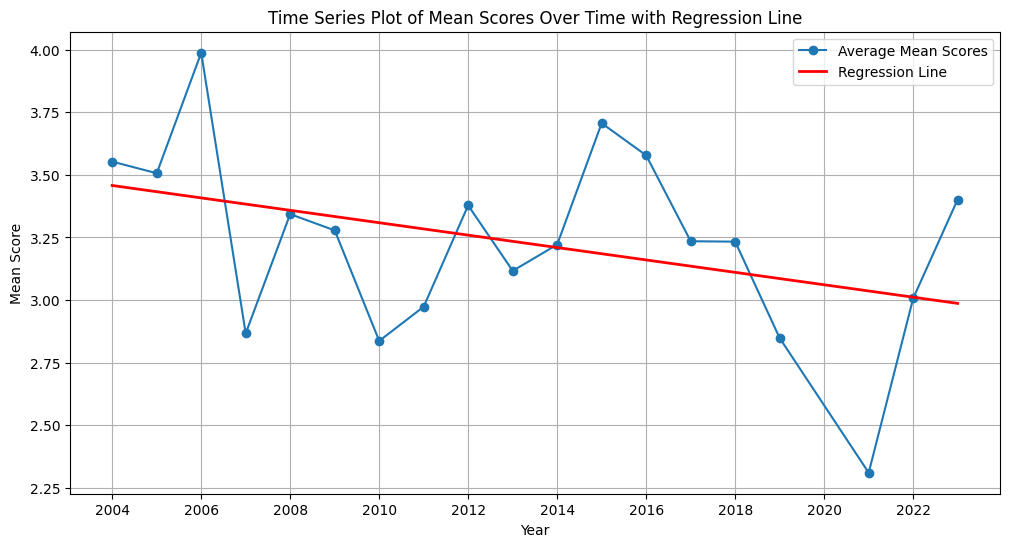

Original Data ADF Statistic: -2.428285
Original Data p-value: 0.133912
Critical Values for Original Data:
	1%: -4.223
	5%: -3.189
	10%: -2.730

Differencing data to achieve stationarity...
Differenced Data ADF Statistic: -1.641469
Differenced Data p-value: 0.461493
Critical Values for Differenced Data:
	1%: -4.332
	5%: -3.233
	10%: -2.749
The series is still not stationary after differencing. Further differencing or transformations may be needed.
Twice-Differenced Data ADF Statistic: -2.261298
Twice-Differenced Data p-value: 0.184754
Critical Values for Twice-Differenced Data:
	1%: -4.223
	5%: -3.189
	10%: -2.730
The series is still not stationary after twice differencing. Further differencing or transformations may be needed.


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

# Assuming 'data' has been loaded previously using pd.read_csv() with 'Year' as the index

# Reset the index to use 'Year' in calculations and plotting
data_reset = data.reset_index()

# Group the data by 'Year' and calculate the average of the 'Mean' scores for each year
yearly_average = data_reset.groupby(data_reset['Year'])['Mean'].mean()

# Convert 'Year' to a numeric format using 'toordinal' for the regression line
yearly_average.index = pd.to_datetime(yearly_average.index, format='%Y')
yearly_average_numeric = yearly_average.index.map(pd.Timestamp.toordinal)

# Calculate the line of best fit using numpy's polyfit function for the averaged data
m, b = np.polyfit(yearly_average_numeric, yearly_average, 1)

# Plot the time series data of the yearly averages
plt.figure(figsize=(12, 6))
plt.plot(yearly_average.index, yearly_average, marker='o', linestyle='-', label='Average Mean Scores')

# Plot the regression line using the slope (m) and intercept (b) from the polyfit calculation
plt.plot(yearly_average.index, m * yearly_average_numeric + b, color='red', linewidth=2, label='Regression Line')

plt.title('Time Series Plot of Mean Scores Over Time with Regression Line')
plt.xlabel('Year')
plt.ylabel('Mean Score')
plt.legend()
plt.grid(True)
plt.show()

# Perform a test for stationarity on the original data
adf_test_original = adfuller(yearly_average)

print('Original Data ADF Statistic: %f' % adf_test_original[0])
print('Original Data p-value: %f' % adf_test_original[1])
print('Critical Values for Original Data:')
for key, value in adf_test_original[4].items():
    print('\t%s: %.3f' % (key, value))

# Differencing the data to achieve stationarity if needed
if adf_test_original[1] > 0.05:  # Data is not stationary
    print("\nDifferencing data to achieve stationarity...")
    yearly_average_diff = yearly_average.diff().dropna()

    # Run ADF test again on the differenced data
    adf_test_diff = adfuller(yearly_average_diff)

    print('Differenced Data ADF Statistic: %f' % adf_test_diff[0])
    print('Differenced Data p-value: %f' % adf_test_diff[1])
    print('Critical Values for Differenced Data:')
    for key, value in adf_test_diff[4].items():
        print('\t%s: %.3f' % (key, value))

    # If the series is now stationary, fit an ARIMA model on the differenced data
    if adf_test_diff[1] < 0.05:
        print("\nFitting ARIMA model on differenced data...")
        model_diff = ARIMA(yearly_average_diff, order=(1,0,1), trend='n')
        model_fit_diff = model_diff.fit()
        print(model_fit_diff.summary())
    else:
        print("The series is still not stationary after differencing. Further differencing or transformations may be needed.")
else:
    print("\nFitting ARIMA model on original data as it is stationary...")
    # Fit the ARIMA model on original stationary data
    model = ARIMA(yearly_average, order=(1,1,1), trend='n')
    model_fit = model.fit()
    print(model_fit.summary())

# Second differencing of the data
yearly_average_diff2 = yearly_average_diff.diff().dropna()

# Run ADF test on the twice-differenced data
adf_test_diff2 = adfuller(yearly_average_diff2)

print('Twice-Differenced Data ADF Statistic: %f' % adf_test_diff2[0])
print('Twice-Differenced Data p-value: %f' % adf_test_diff2[1])
print('Critical Values for Twice-Differenced Data:')
for key, value in adf_test_diff2[4].items():
    print('\t%s: %.3f' % (key, value))

# If the series is now stationary, consider fitting an ARIMA model on the twice-differenced data
if adf_test_diff2[1] < 0.05:
    print("\nFitting ARIMA model on twice-differenced data...")
    model_diff2 = ARIMA(yearly_average_diff2, order=(1,0,1), trend='n')
    model_fit_diff2 = model_diff2.fit()
    print(model_fit_diff2.summary())
else:
    print("The series is still not stationary after twice differencing. Further differencing or transformations may be needed.")


# ARIMA (AutoRegressive Integrated Moving Average) 

This is a popular time series forecasting model that combines autoregressive (AR), differencing (I), and moving average (MA) components to capture different aspects of time series data.

Here's how you can implement ARIMA modeling in Python using the statsmodels library:

                               SARIMAX Results                                
Dep. Variable:                   Mean   No. Observations:                  114
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -146.351
Date:                Wed, 14 Feb 2024   AIC                            298.702
Time:                        11:38:28   BIC                            306.884
Sample:                             0   HQIC                           302.023
                                - 114                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0479      0.122     -0.394      0.694      -0.286       0.191
ma.L1         -0.9640      0.040    -24.332      0.000      -1.042      -0.886
sigma2         0.7620      0.101      7.525      0.0

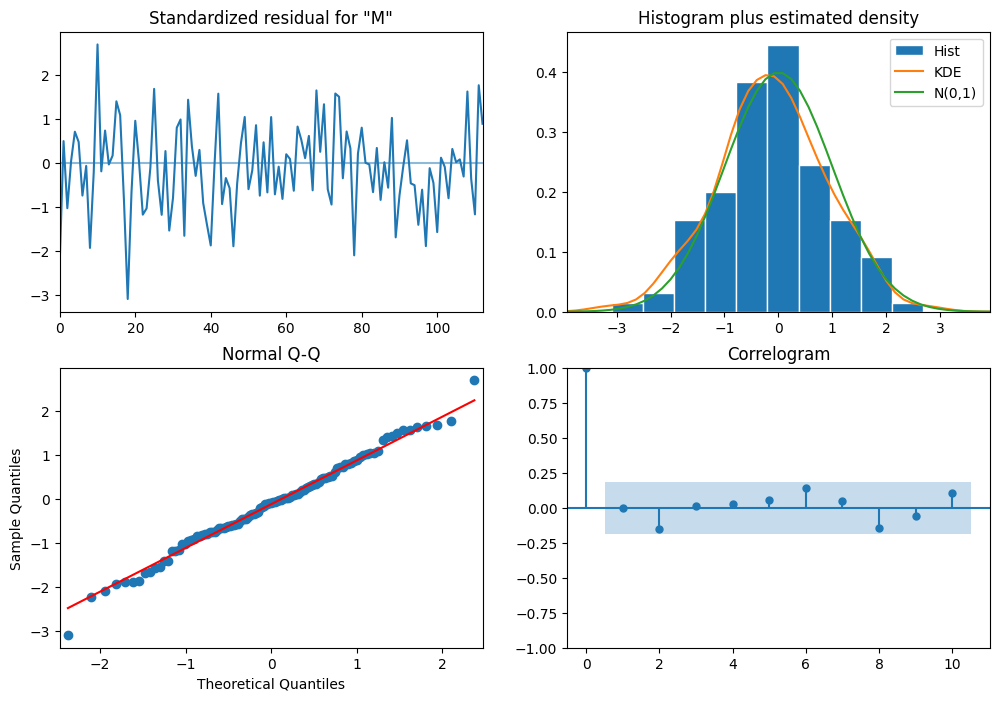

Forecasted values:
Mean      mean   mean_se  mean_ci_lower  mean_ci_upper
114   3.086215  0.872907       1.375350       4.797081
115   3.119928  0.872968       1.408942       4.830914
116   3.118313  0.873551       1.406185       4.830442
117   3.118391  0.874062       1.405261       4.831520
118   3.118387  0.874575       1.404251       4.832523


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

# Assuming 'data_path' is defined and points to your CSV file

# Load the dataset with 'Year' column as the index
data = pd.read_csv(data_path, index_col='Year')

# Convert the index to datetime format
data.index = pd.to_datetime(data.index)

# Ensure the index is sorted
data = data.sort_index()

# Check if the index is monotonically increasing to ensure it's in a consistent order
if not data.index.is_monotonic_increasing:
    print("Index is not monotonically increasing. Attempting to sort the index...")
    data = data.sort_index()

# Proceed without setting the 'freq' attribute due to the ValueError encountered
# data.index.freq = 'AS'  # Omitted due to potential issues with data conformity

# Reset the index to get a simple integer index instead of datetime, and drop the original date index
data_reset = data.reset_index(drop=True)

# Fit ARIMA model using the integer index
model = sm.tsa.ARIMA(data_reset['Mean'], order=(1,1,1))  # ARIMA(p,d,q) with p=1, d=1, and q=1
results = model.fit()

# Print model summary
print(results.summary())

# Plot diagnostics
results.plot_diagnostics(figsize=(12, 8))
plt.show()

# Forecast future values using get_forecast instead of forecast for detailed output
forecast_steps = 5  # Number of steps to forecast into the future
forecast = results.get_forecast(steps=forecast_steps)

# Print forecasted values using summary_frame for a detailed view including confidence intervals
print("Forecasted values:")
print(forecast.summary_frame())



1. **Load the dataset**: Load the dataset with the 'Year' column as the index and convert the index to datetime format.

2. **Fit ARIMA model**: Fit an ARIMA model with order (1,1,1), which means one autoregressive (AR) term, one differencing (I) term, and one moving average (MA) term.

3. **Print model summary**: Print the summary of the model to examine the coefficients and statistical information.

4. **Plot diagnostics**: Plot the diagnostics of the model to check for any patterns or anomalies in the residuals.

5. **Forecast future values**: Forecast future values using the trained ARIMA model for the specified number of steps into the future.

6. **Print forecasted values**: Print the forecasted values for the specified number of steps into the future.


# K-means Clustering

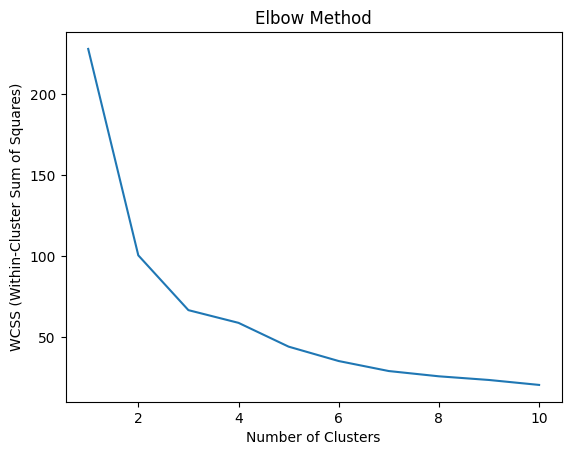

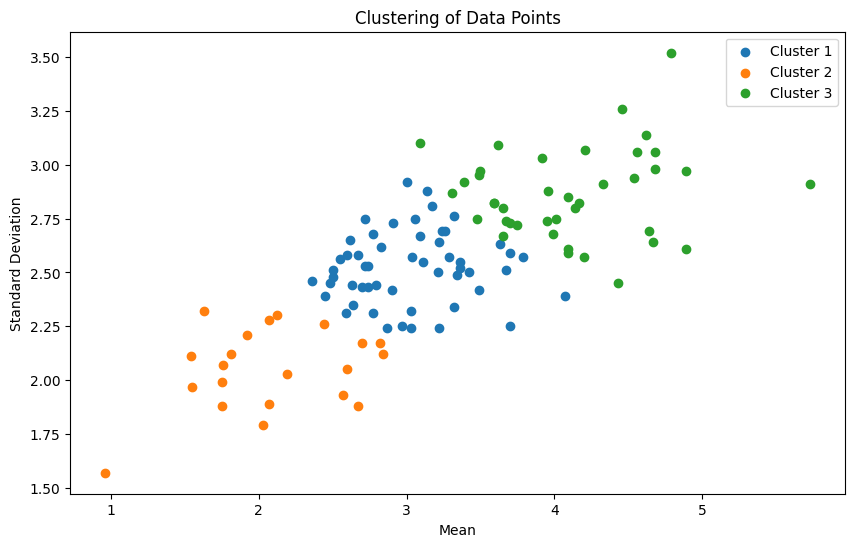

In [15]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the dataset
data = pd.read_csv(data_path)

# Select relevant features for clustering (e.g., 'Mean', 'Standard Deviation')
features = ['Mean', 'Standard Deviation']
X = data[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce dimensionality (optional)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Determine the optimal number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)

# Plot the Elbow method
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

# Based on the Elbow method, choose the optimal number of clusters
k = 3  # for example

# Perform K-means clustering
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Add cluster labels to the original dataset
data['Cluster'] = clusters

# Visualize the clusters
plt.figure(figsize=(10, 6))
for cluster in range(k):
    cluster_data = data[data['Cluster'] == cluster]
    plt.scatter(cluster_data['Mean'], cluster_data['Standard Deviation'], label=f'Cluster {cluster+1}')
plt.title('Clustering of Data Points')
plt.xlabel('Mean')
plt.ylabel('Standard Deviation')
plt.legend()
plt.show()


1. **Load the dataset**: Load the dataset and select relevant features for clustering.
   
2. **Standardize the features**: Use StandardScaler to standardize the features to ensure that all variables contribute equally to the clustering process.

3. **Apply PCA (optional)**: Optionally, apply Principal Component Analysis (PCA) to reduce the dimensionality of the dataset. This step is beneficial when dealing with high-dimensional data.

4. **Determine the optimal number of clusters**: Use the Elbow method to determine the optimal number of clusters. The Elbow method helps identify the point where the within-cluster sum of squares (WCSS) starts to decrease at a slower rate, indicating the optimal number of clusters.

5. **Perform K-means clustering**: Perform K-means clustering with the chosen number of clusters. K-means is a popular clustering algorithm that partitions the data into K clusters based on similarity.

6. **Visualize the clusters**: Visualize the clusters by plotting the data points with different colors corresponding to their assigned clusters. This visualization helps understand how the data points are grouped based on their features.
